In [24]:
from selenium import webdriver
from selenium.webdriver.edge.service import Service
import time

# Use the exact full path to msedgedriver.exe
edge_driver_path = r"C:\edgedriver\msedgedriver.exe"
service = Service(edge_driver_path)

options = webdriver.EdgeOptions()
# options.add_argument("--headless")  # Optional

driver = webdriver.Edge(service=service, options=options)

# Open VRBO listing
url = "https://www.vrbo.com/3799837"
driver.get(url)

time.sleep(5)

# Print first 5000 characters of page source
print(driver.page_source[:5000])

# Keep browser open for interactive scraping
print("Browser is open. You can now scrape or interact manually.")


<html data-language="en_US" dir="ltr" lang="en"><head><link rel="preconnect" href="https://media.vrbo.com"><link rel="preconnect" href="https://a.travel-assets.com"><link rel="dns-prefetch" href="https://a.travel-assets.com"><link rel="preconnect" href="https://b.travel-assets.com"><link rel="dns-prefetch" href="https://b.travel-assets.com"><link rel="preconnect" href="https://c.travel-assets.com"><link rel="dns-prefetch" href="https://c.travel-assets.com"><link rel="preload" href="https://z.travel-assets.com/blossom-flex-ui/mobx.e52f22cba1f84d6e8c23.js" as="script"><link rel="preload" href="https://z.travel-assets.com/blossom-flex-ui/egds.4ca5b4927ec6a4fadf00.js" as="script"><link rel="preload" href="https://z.travel-assets.com/blossom-flex-ui/shared~TravelersField.912db49f96c3cd8abfd8.js" as="script"><link rel="preload" href="https://z.travel-assets.com/blossom-flex-ui/core.4e411c29fba8a626ad2c.js" as="script"><link rel="preload" href="https://z.travel-assets.com/blossom-flex-ui/bern

<html data-language="en_US" dir="ltr" lang="en"><head><link rel="preconnect" href="https://media.vrbo.com"><link rel="preconnect" href="https://a.travel-assets.com"><link rel="dns-prefetch" href="https://a.travel-assets.com"><link rel="preconnect" href="https://b.travel-assets.com"><link rel="dns-prefetch" href="https://b.travel-assets.com"><link rel="preconnect" href="https://c.travel-assets.com"><link rel="dns-prefetch" href="https://c.travel-assets.com"><link rel="preload" href="https://z.travel-assets.com/blossom-flex-ui/mobx.e52f22cba1f84d6e8c23.js" as="script"><link rel="preload" href="https://z.travel-assets.com/blossom-flex-ui/egds.4ca5b4927ec6a4fadf00.js" as="script"><link rel="preload" href="https://z.travel-assets.com/blossom-flex-ui/shared~TravelersField.912db49f96c3cd8abfd8.js" as="script"><link rel="preload" href="https://z.travel-assets.com/blossom-flex-ui/core.4e411c29fba8a626ad2c.js" as="script"><link rel="preload" href="https://z.travel-assets.com/blossom-flex-ui/bern
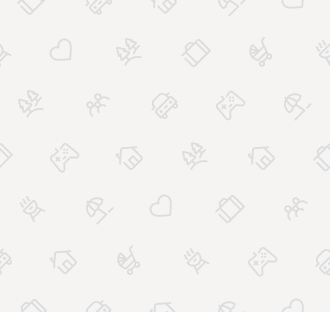

In [25]:
# Print first 5000 characters of HTML to avoid huge output
page_content = driver.page_source
print(page_content[:500000])


In [26]:
# import re

# # Get the page source after clicking "Check availability"
# page_content = driver.page_source

# # Regex to find any words or class names containing "calendar" or "date"
# calendar_matches = re.findall(r'\b\w*(?:calendar|date)\w*\b', page_content, flags=re.IGNORECASE)

# # Deduplicate and sort
# calendar_matches = sorted(set(calendar_matches))

# # Print all matches
# print("Found calendar/date related data:")
# for match in calendar_matches:
#     print(match)

# # Save for further analysis
# calendar_data = calendar_matches


In [27]:
# from selenium.webdriver.common.by import By
# from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC

# # List of likely date input fields (from your discovery)
# date_fields = ["startDate", "endDate", "checkInDate", "checkoutDate"]

# wait = WebDriverWait(driver, 10)

# for field_id in date_fields:
#     try:
#         # Wait for the element to exist
#         elem = wait.until(EC.presence_of_element_located((By.ID, field_id)))
        
#         # Inject JavaScript to listen for changes
#         driver.execute_script("""
#             var input = arguments[0];
#             if (!input.hasAttribute('data-listener')) {
#                 input.addEventListener('change', function() {
#                     console.log('Date field changed:', input.id, 'New value:', input.value);
#                 });
#                 input.setAttribute('data-listener', 'true');
#             }
#         """, elem)
#         print(f"Listening for changes on field: {field_id}")
#     except:
#         pass

# print("Event listeners attached. Edit the dates manually in the browser to trigger events.")


In [28]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from urllib.parse import urlparse, parse_qs, urlencode, urlunparse

# Original VRBO URL
base_url = "https://www.vrbo.com/3799837?chkin=2025-11-19&chkout=2025-11-21&d1=2025-11-19&d2=2025-11-21&startDate=2025-11-19&endDate=2025-11-21&x_pwa=1&rfrr=HSR&pwa_ts=1761021047324&referrerUrl=aHR0cHM6Ly93d3cudnJiby5jb20vSG90ZWwtU2VhcmNo&useRewards=false&adults=2&regionId=553248635976433172&destination=Chatham+County%2C+Georgia%2C+United+States+of+America&destType=MARKET&selected=101484768&latLong=32.056457%2C-81.095127&searchId=e7bc0006-378a-47fa-8da0-cd4216c95ae5&sort=RECOMMENDED&top_dp=304&top_cur=USD&userIntent=&selectedRoomType=101484768&selectedRatePlan=000441a3f81b57a04f81b1ce76747c0d411c&expediaPropertyId=101484768"

# Desired check-in and check-out
new_chkin = "2025-12-05"
new_chkout = "2025-12-10"

# Parse URL and update parameters
url_parts = list(urlparse(base_url))
query = parse_qs(url_parts[4])

for key in ["chkin", "chkout", "d1", "d2", "startDate", "endDate"]:
    if key in query:
        query[key] = [new_chkin if "in" in key else new_chkout]

url_parts[4] = urlencode(query, doseq=True)
new_url = urlunparse(url_parts)

# Navigate browser to new URL
driver.get(new_url)
print(f"Opened VRBO page for new dates: {new_chkin} -> {new_chkout}")

# Optional: wait for calendar/availability section to load
wait = WebDriverWait(driver, 10)
wait.until(EC.presence_of_element_located((By.TAG_NAME, "body")))

# Print page source (or you can search for availability d


Opened VRBO page for new dates: 2025-12-05 -> 2025-12-10


<selenium.webdriver.remote.webelement.WebElement (session="5ae2f9562e70869b05c2faed3dba2e89", element="f.0B9C5770D12338F1269DB8300DDCED56.d.9821E1761AE3BE2E5427C080FAC2EB2B.e.130")>

In [29]:
import re

# List of all calendar/date-related variables you found
keys = [
    "26endDate",
    "26startDate",
    "App_Shell_Property_Requirement_Web_Dateless",
    "Avail_Rate_Calendar_Lowest_Prices_only_Web",
    "Bernie_dialog_delay_navigation_update",
    "Bex_Non_Sim2Pin_Increase_Ad_Candidate_Pool_Size",
    "Bex_Package_Increase_Ad_Candidate_Pool_Size",
    "Bex_Sim2Pin_Increase_Ad_Candidate_Pool_Size",
    "Date",
    "Date_Selector_Migration_BEX_Web",
    "Dated",
    "Enable_Vrbo_SUVR_Rate_Calendar",
    "HoB_Non_Sim2Pin_Increase_Ad_Candidate_Pool_Size",
    "HoB_Sim2Pin_Increase_Ad_Candidate_Pool_Size",
    "Search_Form_Calendar_Size_Test",
    "Traveler_Selector_Interaction_Update_Lodging_Entry_and_SRP",
    "VRBO_Web_close_search_playback_on_field_update",
    "calendar",
    "calendar__background_color",
    "calendar__cell__border_color",
    "calendar__day__name__font_line_height",
    "calendar__day__name__font_size",
    "calendar__day__name__font_weight",
    "calendar__day__name__text_color",
    "calendar__day__spacing_outer_bottom",
    # ... add the rest of your list here
    "updater"
]

# Grab page source
page_source = driver.page_source

# Function to extract raw data for a key
def extract_key_value(page, key):
    # Matches JS variable assignments: var key = ..., key: ..., "key": ...
    patterns = [
        rf'{re.escape(key)}\s*=\s*([^;]+);',
        rf'{re.escape(key)}\s*:\s*([^,}}]+)',
        rf'"{re.escape(key)}"\s*:\s*([^,}}]+)'
    ]
    for pattern in patterns:
        match = re.search(pattern, page)
        if match:
            return match.group(1).strip()
    return None

# Print all keys with their found values
for key in keys:
    value = extract_key_value(page_source, key)
    print(f"{key}: {value}\n")


26endDate: None

26startDate: None

App_Shell_Property_Requirement_Web_Dateless: None

Avail_Rate_Calendar_Lowest_Prices_only_Web: None

Bernie_dialog_delay_navigation_update: None

Bex_Non_Sim2Pin_Increase_Ad_Candidate_Pool_Size: None

Bex_Package_Increase_Ad_Candidate_Pool_Size: None

Bex_Sim2Pin_Increase_Ad_Candidate_Pool_Size: None

Date: 2025-12-10&endDate=2025-12-10&x_pwa=1&rfrr=HSR&pwa_ts=1761021047324&referrerUrl=aHR0cHM6Ly93d3cudnJiby5jb20vSG90ZWwtU2VhcmNo&useRewards=false&adults=2&regionId=553248635976433172&destination=Chatham%20County%2C%20Georgia%2C%20United%20States%20of%20America&destType=MARKET&selected=101484768&latLong=32.056457%2C-81.095127&searchId=e7bc0006-378a-47fa-8da0-cd4216c95ae5&sort=RECOMMENDED&top_dp=304&top_cur=USD&selectedRoomType=101484768&selectedRatePlan=000441a3f81b57a04f81b1ce76747c0d411c&expediaPropertyId=101484768\"}},\"page-performance\":{\"pagePerformance\":{\"context\":{\"timestamp\":\"2025-10-21T04:41:46.072Z\",\"traceId\":\"d3b444c0-76c7-4dc5-8

In [31]:
from selenium.webdriver.common.by import By

# Find all available days on the currently loaded page
available_days = driver.find_elements(By.XPATH, '//td[not(contains(@class,"Unavailable")) and @data-day]')

# Extract the dates
dates_list = [day.get_attribute("data-day") for day in available_days]

# Print available dates
print("Available dates:")
for date in dates_list:
    print(date)


Available dates:


<html data-language="en_US" dir="ltr" lang="en"><head><title>Travel: Vacations, Cheap Flights, Airline Tickets &amp; Airfares</title><link rel="canonical" href="https://www.vrbo.com/3799837"><link rel="preconnect" href="https://media.vrbo.com/"><script src="/efr/tw.js?reportingSegment=9001,www.vrbo.com,vrbo,TIB&amp;placement=INQUIRY" type="text/javascript"></script><script type="text/javascript" id="tw-script" async="true" defer="true" src="https://www.expedia.com/trustProxy/tw.prod.spx.min.js"></script><link rel="preconnect" href="https://maps.googleapis.com/"><link rel="preload" href="https://z.travel-assets.com/shopping-pwa/bernie.26ce5211da419f9a6864.js" as="script"><link rel="preload" href="https://z.travel-assets.com/shopping-pwa/core.9763d3fe4197a0b926b6.js" as="script"><link rel="preload" href="https://z.travel-assets.com/shopping-pwa/egds.6560f7ced35186365c2b.js" as="script"><link rel="preload" href="https://z.travel-assets.com/shopping-pwa/global-components.eaebc03609e59b53d8
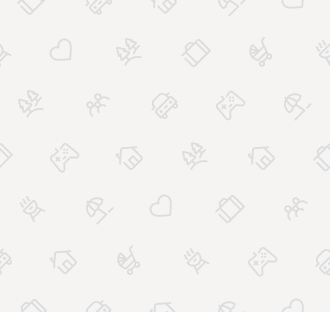
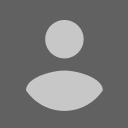

In [32]:
# Get the entire page source
page_source = driver.page_source

# Print it (can be very long!)
print(page_source)


In [35]:
from selenium.webdriver.common.by import By

# Find all day elements
days = driver.find_elements(By.CSS_SELECTOR, "div.uitk-day")

available_dates = []
unavailable_dates = []

for day in days:
    label = day.get_attribute("aria-label")
    if not label:
        continue
    # Get the availability background class
    bg = day.find_element(By.CSS_SELECTOR, "div.uitk-availability-background").get_attribute("class")
    if "available" in bg:
        available_dates.append(label)
    else:
        unavailable_dates.append(label)

# Print results
print("Available dates:")
for d in available_dates:
    print(d)

print("\nUnavailable dates:")
for d in unavailable_dates:
    print(d)


Available dates:

Unavailable dates:


In [38]:
from selenium.webdriver.common.by import By
from datetime import datetime, date

# Find all the day elements in the calendar
day_elements = driver.find_elements(By.CSS_SELECTOR, "div.uitk-day-button")

parsed_dates = []

today = date.today()

for day in day_elements:
    # Get the aria-label with the full date description
    label = day.find_element(By.CSS_SELECTOR, "div.uitk-day-aria-label").get_attribute("aria-label")
    
    # Try to parse a date from the label
    # Labels are like: "Monday, October 21, 2025 is unavailable." or "Tuesday, October 22, 2025"
    try:
        date_str = label.split(", ", 1)[1].split(" is")[0].split(" for")[0]  # Extract "October 21, 2025"
        day_date = datetime.strptime(date_str, "%B %d, %Y").date()
    except Exception:
        continue  # skip if parsing fails
    
    # Skip past dates
    if day_date < today:
        continue

    # Determine availability from the background class
    bg_div = day.find_element(By.CSS_SELECTOR, "div.uitk-availability-background")
    bg_class = bg_div.get_attribute("class")
    
    if "uitk-background-unavailable" in bg_class:
        status = "unavailable"          # fully unavailable
    elif "uitk-background-am-unavailable" in bg_class:
        status = "AM unavailable"
    elif "uitk-background-pm-unavailable" in bg_class:
        status = "PM unavailable"
    elif "uitk-background-available" in bg_class:
        status = "available"            # fully available
    else:
        status = "unknown"
    
    parsed_dates.append({
        "date": day_date,
        "status": status,
        "label": label
    })

# Sort by date
parsed_dates.sort(key=lambda x: x["date"])

# Print results
for d in parsed_dates:
    print(d)


{'date': datetime.date(2025, 10, 21), 'status': 'unavailable', 'label': 'Tuesday, October 21, 2025 is unavailable.'}
{'date': datetime.date(2025, 10, 22), 'status': 'unavailable', 'label': 'Wednesday, October 22, 2025 is unavailable.'}
{'date': datetime.date(2025, 10, 23), 'status': 'unavailable', 'label': 'Thursday, October 23, 2025 is unavailable.'}
{'date': datetime.date(2025, 10, 25), 'status': 'available', 'label': 'Saturday, October 25, 2025'}
{'date': datetime.date(2025, 10, 26), 'status': 'available', 'label': 'Sunday, October 26, 2025'}
{'date': datetime.date(2025, 10, 27), 'status': 'available', 'label': 'Monday, October 27, 2025'}
{'date': datetime.date(2025, 10, 28), 'status': 'available', 'label': 'Tuesday, October 28, 2025'}
{'date': datetime.date(2025, 10, 30), 'status': 'unavailable', 'label': 'Thursday, October 30, 2025 is unavailable.'}
{'date': datetime.date(2025, 10, 31), 'status': 'unavailable', 'label': 'Friday, October 31, 2025 is unavailable.'}
{'date': datetime

{'date': datetime.date(2025, 10, 21), 'status': 'unavailable', 'label': 'Tuesday, October 21, 2025 is unavailable.'}
{'date': datetime.date(2025, 10, 22), 'status': 'unavailable', 'label': 'Wednesday, October 22, 2025 is unavailable.'}
{'date': datetime.date(2025, 10, 23), 'status': 'unavailable', 'label': 'Thursday, October 23, 2025 is unavailable.'}
{'date': datetime.date(2025, 10, 25), 'status': 'available', 'label': 'Saturday, October 25, 2025'}
{'date': datetime.date(2025, 10, 26), 'status': 'available', 'label': 'Sunday, October 26, 2025'}
{'date': datetime.date(2025, 10, 27), 'status': 'available', 'label': 'Monday, October 27, 2025'}
{'date': datetime.date(2025, 10, 28), 'status': 'available', 'label': 'Tuesday, October 28, 2025'}
{'date': datetime.date(2025, 10, 30), 'status': 'unavailable', 'label': 'Thursday, October 30, 2025 is unavailable.'}
{'date': datetime.date(2025, 10, 31), 'status': 'unavailable', 'label': 'Friday, October 31, 2025 is unavailable.'}
{'date': datetime

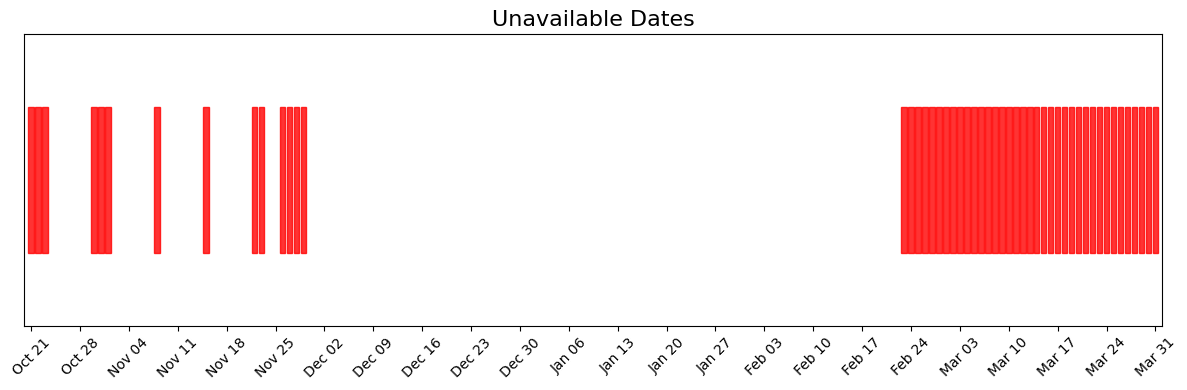

In [43]:
from selenium.webdriver.common.by import By
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# --- SCRAPE CALENDAR DATA ---
day_elements = driver.find_elements(By.CSS_SELECTOR, "div.uitk-day-button")

parsed_dates = []
today = date.today()

for day in day_elements:
    # Get aria-label (contains date + availability info)
    label = day.find_element(By.CSS_SELECTOR, "div.uitk-day-aria-label").get_attribute("aria-label")

    try:
        # Extract "October 21, 2025" from the label
        date_str = label.split(", ", 1)[1].split(" is")[0].split(" for")[0]
        day_date = datetime.strptime(date_str, "%B %d, %Y").date()
    except Exception:
        continue

    if day_date < today:
        continue

    # Determine availability based on background class
    bg_div = day.find_element(By.CSS_SELECTOR, "div.uitk-availability-background")
    bg_class = bg_div.get_attribute("class")

    if "uitk-background-unavailable" in bg_class:
        status = "unavailable"
    elif "uitk-background-am-unavailable" in bg_class:
        status = "AM unavailable"
    elif "uitk-background-pm-unavailable" in bg_class:
        status = "PM unavailable"
    elif "uitk-background-available" in bg_class:
        status = "available"
    else:
        status = "unknown"

    parsed_dates.append({
        "date": day_date,
        "status": status,
        "label": label
    })

# --- SORT AND PRINT ---
parsed_dates.sort(key=lambda x: x["date"])
for d in parsed_dates:
    print(d)

# --- PLOT CALENDAR (RED = UNAVAILABLE) ---
unavailable_days = [d["date"] for d in parsed_dates if "unavailable" in d["status"].lower()]

if not unavailable_days:
    print("⚠️ No unavailable days found to plot.")
else:
    start_date = min(unavailable_days)
    end_date = max(unavailable_days)
    all_days = [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1)]

    fig, ax = plt.subplots(figsize=(12, 4))
    ax.set_title("Unavailable Dates", fontsize=16)
    ax.set_yticks([])
    ax.set_ylabel("")

    # Red blocks for unavailable dates
    for d in unavailable_days:
        ax.add_patch(
            plt.Rectangle((mdates.date2num(d) - 0.4, 0.25), 0.8, 0.5, color="red", alpha=0.8)
        )

    ax.set_xlim(mdates.date2num(start_date) - 1, mdates.date2num(end_date) + 1)
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



📅 October 2025
+-------+-------+-------+-------+-------+-------+-------+
| Mon   | Tue   | Wed   | Thu   | Fri   | Sat   | Sun   |
+=======+=======+=======+=======+=======+=======+=======+
|       |       | 01    | 02    | 03    | 04    | 05    |
+-------+-------+-------+-------+-------+-------+-------+
| 06    | 07    | 08    | 09    | 10    | 11    | 12    |
+-------+-------+-------+-------+-------+-------+-------+
| 13    | 14    | 15    | 16    | 17    | 18    | 19    |
+-------+-------+-------+-------+-------+-------+-------+
| 20    | ❌21  | ❌22  | ❌23  | 24    | ✅25  | ✅26  |
+-------+-------+-------+-------+-------+-------+-------+
| ✅27  | ✅28  | 29    | ❌30  | ❌31  |       |       |
+-------+-------+-------+-------+-------+-------+-------+

📅 November 2025
+-------+-------+-------+-------+-------+-------+-------+
| Mon   | Tue   | Wed   | Thu   | Fri   | Sat   | Sun   |
+=======+=======+=======+=======+=======+=======+=======+
|       |       |       |       |       | ❌01  |

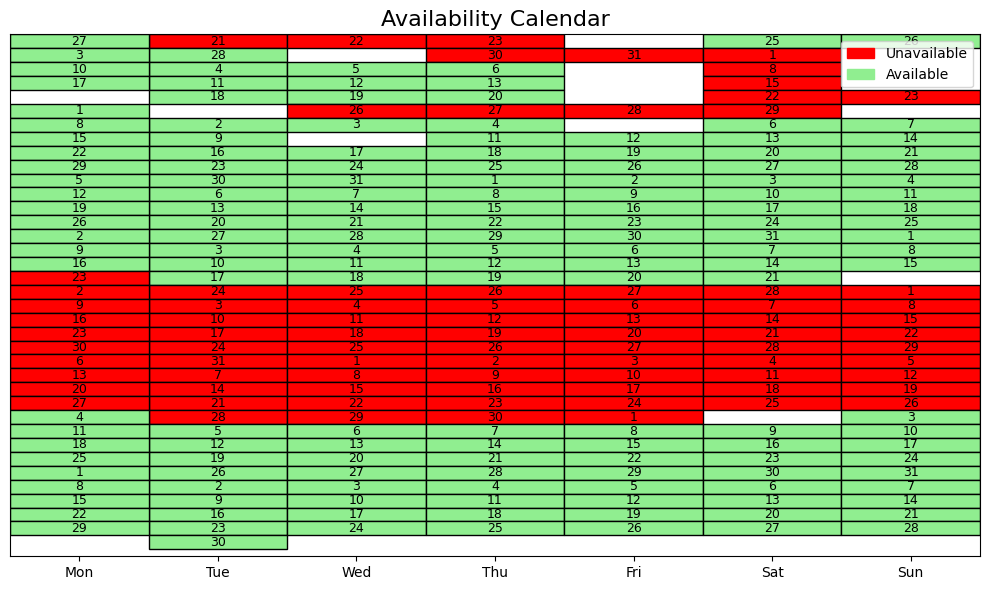

In [48]:
from selenium.webdriver.common.by import By
from datetime import datetime, date, timedelta
import calendar
from tabulate import tabulate
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# --- SCRAPE CALENDAR DATA ---
day_elements = driver.find_elements(By.CSS_SELECTOR, "div.uitk-day-button")
parsed_dates = []
today = date.today()

for day in day_elements:
    label = day.find_element(By.CSS_SELECTOR, "div.uitk-day-aria-label").get_attribute("aria-label")

    try:
        date_str = label.split(", ", 1)[1].split(" is")[0].split(" for")[0]
        day_date = datetime.strptime(date_str, "%B %d, %Y").date()
    except Exception:
        continue

    if day_date < today:
        continue

    bg_div = day.find_element(By.CSS_SELECTOR, "div.uitk-availability-background")
    bg_class = bg_div.get_attribute("class")

    if "uitk-background-unavailable" in bg_class:
        status = "unavailable"
    elif "uitk-background-am-unavailable" in bg_class or "uitk-background-pm-unavailable" in bg_class:
        status = "partially unavailable"
    elif "uitk-background-available" in bg_class:
        status = "available"
    else:
        status = "unknown"

    parsed_dates.append({"date": day_date, "status": status, "label": label})

parsed_dates.sort(key=lambda x: x["date"])

# --- ORGANIZE INTO MONTHLY CALENDARS ---
availability = {d["date"]: d["status"] for d in parsed_dates}
months = sorted(set((d["date"].year, d["date"].month) for d in parsed_dates))

for (year, month) in months:
    cal = calendar.Calendar()
    month_days = cal.monthdayscalendar(year, month)

    table = []
    headers = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

    for week in month_days:
        row = []
        for day_num in week:
            if day_num == 0:
                row.append(" ")
                continue
            d = date(year, month, day_num)
            status = availability.get(d, "")
            if "unavailable" in status:
                row.append(f"❌{day_num:02d}")
            elif "available" in status:
                row.append(f"✅{day_num:02d}")
            else:
                row.append(f"{day_num:02d}")
        table.append(row)

    print(f"\n📅 {calendar.month_name[month]} {year}")
    print(tabulate(table, headers=headers, tablefmt="grid"))

# --- PLOT HEATMAP CALENDAR ---
if not parsed_dates:
    print("⚠️ No dates found to plot.")
else:
    all_dates = [d["date"] for d in parsed_dates]
    min_d, max_d = min(all_dates), max(all_dates)
    unavailable_dates = [d["date"] for d in parsed_dates if "unavailable" in d["status"]]

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title("Availability Calendar", fontsize=16)

    for d in parsed_dates:
        x = d["date"].isoweekday()
        y = (d["date"] - min_d).days // 7
        color = "red" if "unavailable" in d["status"] else "lightgreen"
        ax.add_patch(plt.Rectangle((x - 0.5, -y - 0.5), 1, 1, color=color, ec="black"))
        ax.text(x, -y, d["date"].day, ha="center", va="center", fontsize=9)

    ax.set_xlim(0.5, 7.5)
    ax.set_ylim(-((max_d - min_d).days // 7) - 1, 0.5)
    ax.set_xticks(range(1, 8))
    ax.set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
    ax.set_yticks([])
    ax.set_ylabel("")

    legend_patches = [
        mpatches.Patch(color="red", label="Unavailable"),
        mpatches.Patch(color="lightgreen", label="Available")
    ]
    ax.legend(handles=legend_patches, loc="upper right")

    plt.tight_layout()
    plt.show()



📅 October 2025
+-------+-------+-------+-------+-------+-------+-------+
| Mon   | Tue   | Wed   | Thu   | Fri   | Sat   | Sun   |
+=======+=======+=======+=======+=======+=======+=======+
|       |       | 01    | 02    | 03    | 04    | 05    |
+-------+-------+-------+-------+-------+-------+-------+
| 06    | 07    | 08    | 09    | 10    | 11    | 12    |
+-------+-------+-------+-------+-------+-------+-------+
| 13    | 14    | 15    | 16    | 17    | 18    | 19    |
+-------+-------+-------+-------+-------+-------+-------+
| 20    | ❌21  | ❌22  | ❌23  | 24    | ✅25  | ✅26  |
+-------+-------+-------+-------+-------+-------+-------+
| ✅27  | ✅28  | 29    | ❌30  | ❌31  |       |       |
+-------+-------+-------+-------+-------+-------+-------+

📅 November 2025
+-------+-------+-------+-------+-------+-------+-------+
| Mon   | Tue   | Wed   | Thu   | Fri   | Sat   | Sun   |
+=======+=======+=======+=======+=======+=======+=======+
|       |       |       |       |       | ❌01  |

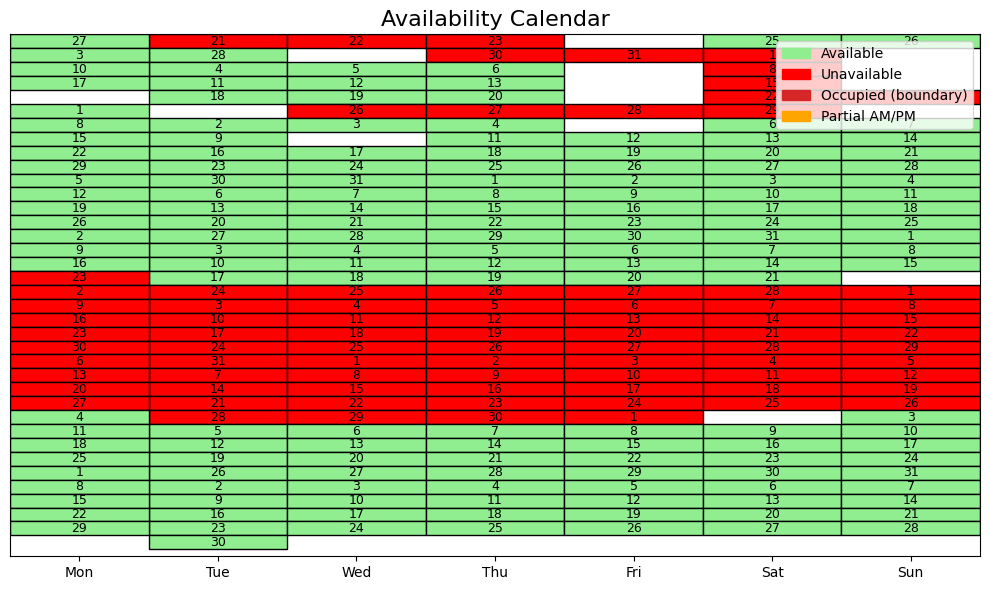

In [49]:
from selenium.webdriver.common.by import By
from datetime import datetime, date, timedelta
import calendar
from tabulate import tabulate
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# --- SCRAPE CALENDAR DATA ---
day_elements = driver.find_elements(By.CSS_SELECTOR, "div.uitk-day-button")
parsed_dates = []
today = date.today()

for day in day_elements:
    label = day.find_element(By.CSS_SELECTOR, "div.uitk-day-aria-label").get_attribute("aria-label")

    try:
        date_str = label.split(", ", 1)[1].split(" is")[0].split(" for")[0]
        day_date = datetime.strptime(date_str, "%B %d, %Y").date()
    except Exception:
        continue

    if day_date < today:
        continue

    bg_div = day.find_element(By.CSS_SELECTOR, "div.uitk-availability-background")
    bg_class = bg_div.get_attribute("class")

    if "uitk-background-unavailable" in bg_class:
        status = "unavailable"
    elif "uitk-background-am-unavailable" in bg_class or "uitk-background-pm-unavailable" in bg_class:
        status = "partial"
    elif "uitk-background-available" in bg_class:
        status = "available"
    else:
        status = "unknown"

    parsed_dates.append({"date": day_date, "status": status, "label": label})

parsed_dates.sort(key=lambda x: x["date"])

# --- INFER TRANSITION DAYS (occupied boundaries) ---
availability = {d["date"]: d["status"] for d in parsed_dates}
dates_sorted = [d["date"] for d in parsed_dates]

for i, d in enumerate(dates_sorted):
    prev_d = d - timedelta(days=1)
    next_d = d + timedelta(days=1)
    if availability[d] == "available":
        # If previous or next is unavailable, mark as boundary (occupied)
        if availability.get(prev_d) == "unavailable" or availability.get(next_d) == "unavailable":
            availability[d] = "occupied"

# --- PRINT MONTHLY TABLES ---
months = sorted(set((d.year, d.month) for d in availability.keys()))

for (year, month) in months:
    cal = calendar.Calendar()
    month_days = cal.monthdayscalendar(year, month)
    table = []
    headers = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

    for week in month_days:
        row = []
        for day_num in week:
            if day_num == 0:
                row.append(" ")
                continue
            d = date(year, month, day_num)
            status = availability.get(d, "")
            if status == "unavailable":
                row.append(f"❌{day_num:02d}")
            elif status == "occupied":
                row.append(f"🔴{day_num:02d}")
            elif status == "available":
                row.append(f"✅{day_num:02d}")
            elif status == "partial":
                row.append(f"🟠{day_num:02d}")
            else:
                row.append(f"{day_num:02d}")
        table.append(row)

    print(f"\n📅 {calendar.month_name[month]} {year}")
    print(tabulate(table, headers=headers, tablefmt="grid"))

# --- PLOT CALENDAR HEATMAP ---
if not parsed_dates:
    print("⚠️ No dates found to plot.")
else:
    all_dates = sorted(availability.keys())
    min_d, max_d = min(all_dates), max(all_dates)

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title("Availability Calendar", fontsize=16)

    color_map = {
        "unavailable": "red",
        "occupied": "#d62728",
        "partial": "orange",
        "available": "lightgreen",
        "unknown": "lightgray"
    }

    for d in all_dates:
        x = d.isoweekday()
        y = (d - min_d).days // 7
        color = color_map.get(availability[d], "white")
        ax.add_patch(plt.Rectangle((x - 0.5, -y - 0.5), 1, 1, color=color, ec="black"))
        ax.text(x, -y, d.day, ha="center", va="center", fontsize=9)

    ax.set_xlim(0.5, 7.5)
    ax.set_ylim(-((max_d - min_d).days // 7) - 1, 0.5)
    ax.set_xticks(range(1, 8))
    ax.set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
    ax.set_yticks([])

    legend_patches = [
        mpatches.Patch(color="lightgreen", label="Available"),
        mpatches.Patch(color="red", label="Unavailable"),
        mpatches.Patch(color="#d62728", label="Occupied (boundary)"),
        mpatches.Patch(color="orange", label="Partial AM/PM"),
    ]
    ax.legend(handles=legend_patches, loc="upper right")
    plt.tight_layout()
    plt.show()


Found 273 calendar day elements...
2025-10-21: unavailable (uitk-availability-background uitk-background-unavailable)
2025-10-22: unavailable (uitk-availability-background uitk-background-unavailable)
2025-10-23: unavailable (uitk-availability-background uitk-background-unavailable)
2025-10-25: available (uitk-availability-background uitk-background-available)
2025-10-26: available (uitk-availability-background uitk-background-available)
2025-10-27: available (uitk-availability-background uitk-background-available)
2025-10-28: available (uitk-availability-background uitk-background-available)
2025-10-30: unavailable (uitk-availability-background uitk-background-unavailable)
2025-10-31: unavailable (uitk-availability-background uitk-background-unavailable)
2025-11-01: unavailable (uitk-availability-background uitk-background-unavailable)
2025-11-03: available (uitk-availability-background uitk-background-available)
2025-11-04: available (uitk-availability-background uitk-background-avai

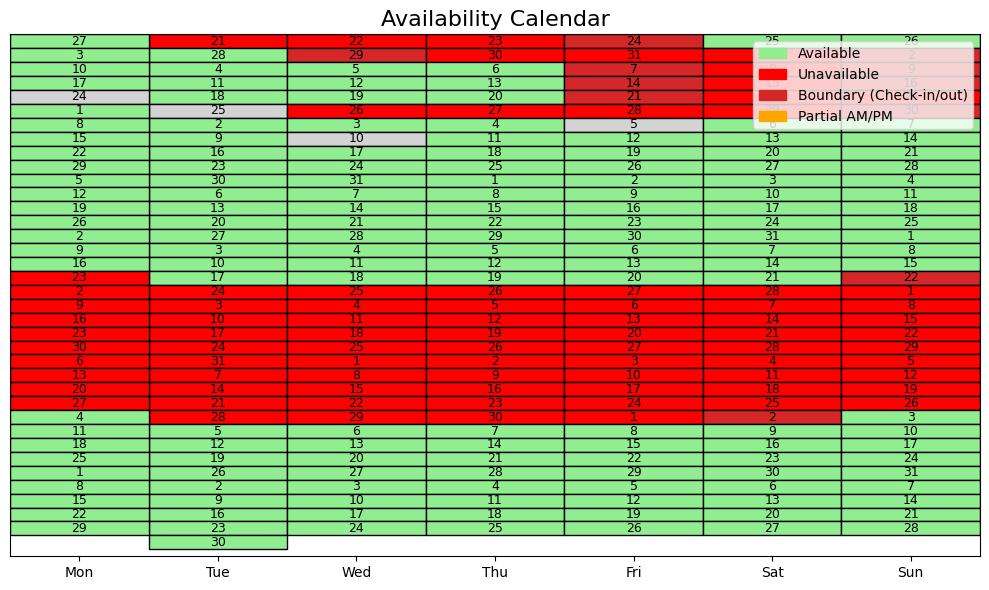

In [51]:
from selenium.webdriver.common.by import By
from datetime import datetime, date, timedelta
import calendar
from tabulate import tabulate
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# --- SCRAPE DATA FROM OPEN WINDOW ---
day_elements = driver.find_elements(By.CSS_SELECTOR, "div.uitk-day-button")
parsed_dates = []
today = date.today()

print(f"Found {len(day_elements)} calendar day elements...")

for day in day_elements:
    try:
        label_elem = day.find_element(By.CSS_SELECTOR, "div.uitk-day-aria-label")
        label = label_elem.get_attribute("aria-label")
    except Exception:
        continue

    try:
        date_str = label.split(", ", 1)[1].split(" is")[0].split(" for")[0]
        day_date = datetime.strptime(date_str, "%B %d, %Y").date()
    except Exception:
        continue

    if day_date < today:
        continue

    try:
        bg_div = day.find_element(By.CSS_SELECTOR, "div.uitk-availability-background")
        bg_class = bg_div.get_attribute("class")
    except Exception:
        bg_class = "none"

    if "uitk-background-unavailable" in bg_class:
        status = "unavailable"
    elif "uitk-background-am-unavailable" in bg_class or "uitk-background-pm-unavailable" in bg_class:
        status = "partial"
    elif "uitk-background-available" in bg_class:
        status = "available"
    else:
        status = "unknown"

    parsed_dates.append({"date": day_date, "status": status})
    print(f"{day_date}: {status} ({bg_class})")

# --- FILL MISSING DATES & MARK TRANSITIONS ---
parsed_dates.sort(key=lambda x: x["date"])
availability = {d["date"]: d["status"] for d in parsed_dates}

# Determine full range
if parsed_dates:
    min_date, max_date = parsed_dates[0]["date"], parsed_dates[-1]["date"]
    current = min_date
    filled = {}

    while current <= max_date:
        if current not in availability:
            # Missing day — fill intelligently
            prev = availability.get(current - timedelta(days=1))
            nxt = availability.get(current + timedelta(days=1))
            if prev == "unavailable" and nxt == "available":
                status = "occupied-start"
            elif prev == "available" and nxt == "unavailable":
                status = "occupied-end"
            else:
                status = "unknown"
        else:
            status = availability[current]
        filled[current] = status
        current += timedelta(days=1)
else:
    filled = {}

# --- PRINT TEXT CALENDAR ---
if not filled:
    print("⚠️ No data found!")
else:
    months = sorted(set((d.year, d.month) for d in filled.keys()))
    for (year, month) in months:
        cal = calendar.Calendar()
        month_days = cal.monthdayscalendar(year, month)
        headers = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
        table = []
        for week in month_days:
            row = []
            for day_num in week:
                if day_num == 0:
                    row.append(" ")
                    continue
                d = date(year, month, day_num)
                status = filled.get(d, "")
                if status == "unavailable":
                    row.append(f"❌{day_num:02d}")
                elif status in ["occupied-start", "occupied-end"]:
                    row.append(f"🔴{day_num:02d}")
                elif status == "available":
                    row.append(f"✅{day_num:02d}")
                elif status == "partial":
                    row.append(f"🟠{day_num:02d}")
                else:
                    row.append(f"{day_num:02d}")
            table.append(row)
        print(f"\n📅 {calendar.month_name[month]} {year}")
        print(tabulate(table, headers=headers, tablefmt="grid"))

# --- PLOT CALENDAR ---
if filled:
    all_dates = sorted(filled.keys())
    min_d, max_d = min(all_dates), max(all_dates)
    color_map = {
        "available": "lightgreen",
        "unavailable": "red",
        "occupied-start": "#d62728",
        "occupied-end": "#d62728",
        "partial": "orange",
        "unknown": "lightgray",
    }

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title("Availability Calendar", fontsize=16)

    for d in all_dates:
        x = d.isoweekday()
        y = (d - min_d).days // 7
        color = color_map.get(filled[d], "white")
        ax.add_patch(plt.Rectangle((x - 0.5, -y - 0.5), 1, 1, color=color, ec="black"))
        ax.text(x, -y, d.day, ha="center", va="center", fontsize=9)

    ax.set_xlim(0.5, 7.5)
    ax.set_ylim(-((max_d - min_d).days // 7) - 1, 0.5)
    ax.set_xticks(range(1, 8))
    ax.set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
    ax.set_yticks([])

    legend_patches = [
        mpatches.Patch(color="lightgreen", label="Available"),
        mpatches.Patch(color="red", label="Unavailable"),
        mpatches.Patch(color="#d62728", label="Boundary (Check-in/out)"),
        mpatches.Patch(color="orange", label="Partial AM/PM"),
    ]
    ax.legend(handles=legend_patches, loc="upper right")
    plt.tight_layout()
    plt.show()


Found 761 calendar day elements...

📅 October 2025
+-------+-------+-------+-------+-------+-------+-------+
| Mon   | Tue   | Wed   | Thu   | Fri   | Sat   | Sun   |
+=======+=======+=======+=======+=======+=======+=======+
|       |       | 01    | 02    | 03    | 04    | 05    |
+-------+-------+-------+-------+-------+-------+-------+
| 06    | 07    | 08    | 09    | 10    | 11    | 12    |
+-------+-------+-------+-------+-------+-------+-------+
| 13    | 14    | 15    | 16    | 17    | 18    | 19    |
+-------+-------+-------+-------+-------+-------+-------+
| 20    | ❌21  | ❌22  | ❌23  | ❌24  | ✅25  | ✅26  |
+-------+-------+-------+-------+-------+-------+-------+
| ✅27  | ✅28  | ❌29  | ❌30  | ❌31  |       |       |
+-------+-------+-------+-------+-------+-------+-------+

📅 November 2025
+-------+-------+-------+-------+-------+-------+-------+
| Mon   | Tue   | Wed   | Thu   | Fri   | Sat   | Sun   |
+=======+=======+=======+=======+=======+=======+=======+
|       |      

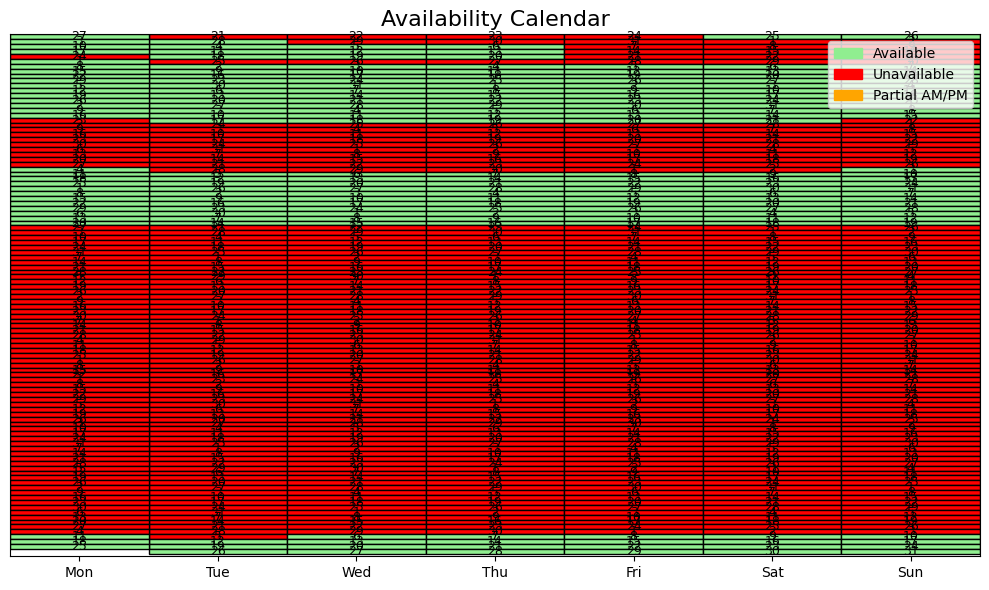

In [54]:
from selenium.webdriver.common.by import By
from datetime import datetime, date, timedelta
import calendar
from tabulate import tabulate
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# --- SCRAPE DATA ---
day_elements = driver.find_elements(By.CSS_SELECTOR, "div.uitk-day-button")
parsed_dates = []
today = date.today()

print(f"Found {len(day_elements)} calendar day elements...")

for day in day_elements:
    try:
        label_elem = day.find_element(By.CSS_SELECTOR, "div.uitk-day-aria-label")
        label = label_elem.get_attribute("aria-label")
    except Exception:
        continue

    try:
        date_str = label.split(", ", 1)[1].split(" is")[0].split(" for")[0]
        day_date = datetime.strptime(date_str, "%B %d, %Y").date()
    except Exception:
        continue

    if day_date < today:
        continue

    try:
        bg_div = day.find_element(By.CSS_SELECTOR, "div.uitk-availability-background")
        bg_class = bg_div.get_attribute("class")
    except Exception:
        bg_class = "none"

    if "uitk-background-unavailable" in bg_class:
        status = "unavailable"
    elif "uitk-background-am-unavailable" in bg_class or "uitk-background-pm-unavailable" in bg_class:
        status = "partial"
    elif "uitk-background-available" in bg_class:
        status = "available"
    else:
        status = "unknown"

    parsed_dates.append({"date": day_date, "status": status})
    # print(f"{day_date}: {status} ({bg_class})")

# --- FILL GAPS INTELLIGENTLY ---
parsed_dates.sort(key=lambda x: x["date"])
availability = {d["date"]: d["status"] for d in parsed_dates}

if parsed_dates:
    min_date, max_date = parsed_dates[0]["date"], parsed_dates[-1]["date"]
    current = min_date
    filled = {}

    while current <= max_date:
        if current not in availability:
            prev = availability.get(current - timedelta(days=1))
            nxt = availability.get(current + timedelta(days=1))
            # Fill logic:
            if prev == nxt == "available":
                status = "available"
            elif prev == nxt == "unavailable":
                status = "unavailable"
            else:
                # mixed or unknown → treat as unavailable (X)
                status = "unavailable"
        else:
            status = availability[current]
        filled[current] = status
        current += timedelta(days=1)
else:
    filled = {}

# --- PRINT TABLE ---
if not filled:
    pass
    # print("⚠️ No data found!")
else:
    months = sorted(set((d.year, d.month) for d in filled.keys()))
    for (year, month) in months:
        cal = calendar.Calendar()
        month_days = cal.monthdayscalendar(year, month)
        headers = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
        table = []
        for week in month_days:
            row = []
            for day_num in week:
                if day_num == 0:
                    row.append(" ")
                    continue
                d = date(year, month, day_num)
                status = filled.get(d, "")
                if status == "unavailable":
                    row.append(f"❌{day_num:02d}")
                elif status == "available":
                    row.append(f"✅{day_num:02d}")
                elif status == "partial":
                    row.append(f"🟠{day_num:02d}")
                else:
                    row.append(f"{day_num:02d}")
            table.append(row)
        print(f"\n📅 {calendar.month_name[month]} {year}")
        print(tabulate(table, headers=headers, tablefmt="grid"))

# --- PLOT ---
if filled:
    all_dates = sorted(filled.keys())
    min_d, max_d = min(all_dates), max(all_dates)
    color_map = {
        "available": "lightgreen",
        "unavailable": "red",
        "partial": "orange",
        "unknown": "lightgray",
    }

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title("Availability Calendar", fontsize=16)

    for d in all_dates:
        x = d.isoweekday()
        y = (d - min_d).days // 7
        color = color_map.get(filled[d], "white")
        ax.add_patch(plt.Rectangle((x - 0.5, -y - 0.5), 1, 1, color=color, ec="black"))
        ax.text(x, -y, d.day, ha="center", va="center", fontsize=9)

    ax.set_xlim(0.5, 7.5)
    ax.set_ylim(-((max_d - min_d).days // 7) - 1, 0.5)
    ax.set_xticks(range(1, 8))
    ax.set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
    ax.set_yticks([])

    legend_patches = [
        mpatches.Patch(color="lightgreen", label="Available"),
        mpatches.Patch(color="red", label="Unavailable"),
        mpatches.Patch(color="orange", label="Partial AM/PM"),
    ]
    ax.legend(handles=legend_patches, loc="upper right")
    plt.tight_layout()
    plt.show()


Found 761 calendar day elements...

📅 October 2025
+-------+-------+-------+-------+-------+-------+-------+
| Mon   | Tue   | Wed   | Thu   | Fri   | Sat   | Sun   |
+=======+=======+=======+=======+=======+=======+=======+
|       |       | 01    | 02    | 03    | 04    | 05    |
+-------+-------+-------+-------+-------+-------+-------+
| 06    | 07    | 08    | 09    | 10    | 11    | 12    |
+-------+-------+-------+-------+-------+-------+-------+
| 13    | 14    | 15    | 16    | 17    | 18    | 19    |
+-------+-------+-------+-------+-------+-------+-------+
| 20    | ❌21  | ❌22  | ❌23  | ✅24  | ✅25  | ✅26  |
+-------+-------+-------+-------+-------+-------+-------+
| ✅27  | ✅28  | ✅29  | ❌30  | ❌31  |       |       |
+-------+-------+-------+-------+-------+-------+-------+

📅 November 2025
+-------+-------+-------+-------+-------+-------+-------+
| Mon   | Tue   | Wed   | Thu   | Fri   | Sat   | Sun   |
+=======+=======+=======+=======+=======+=======+=======+
|       |      

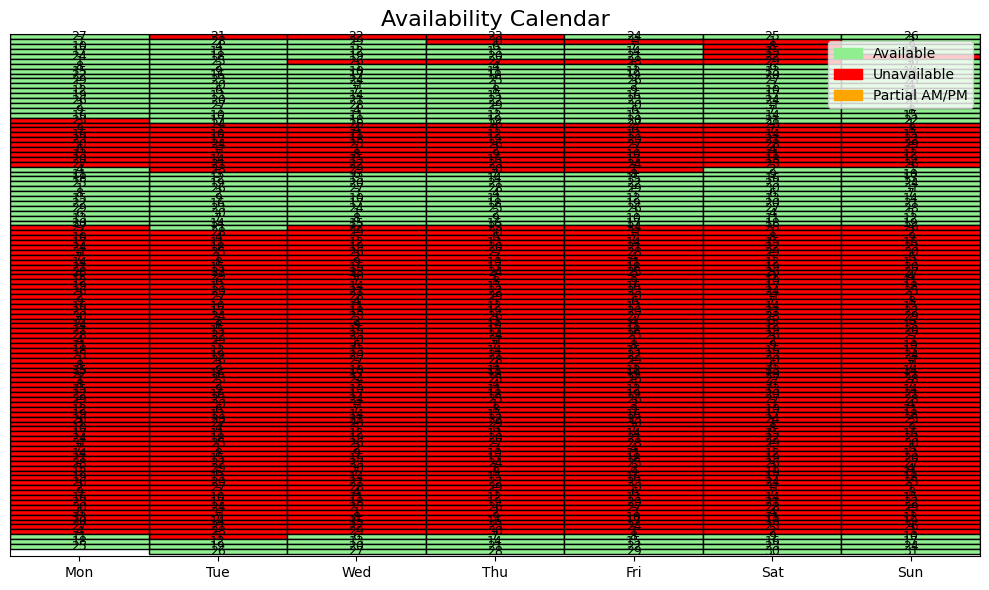

In [55]:
from selenium.webdriver.common.by import By
from datetime import datetime, date, timedelta
import calendar
from tabulate import tabulate
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# --- SCRAPE DATA ---
day_elements = driver.find_elements(By.CSS_SELECTOR, "div.uitk-day-button")
parsed_dates = []
today = date.today()

print(f"Found {len(day_elements)} calendar day elements...")

for day in day_elements:
    try:
        label_elem = day.find_element(By.CSS_SELECTOR, "div.uitk-day-aria-label")
        label = label_elem.get_attribute("aria-label")
    except Exception:
        continue

    try:
        date_str = label.split(", ", 1)[1].split(" is")[0].split(" for")[0]
        day_date = datetime.strptime(date_str, "%B %d, %Y").date()
    except Exception:
        continue

    if day_date < today:
        continue

    try:
        bg_div = day.find_element(By.CSS_SELECTOR, "div.uitk-availability-background")
        bg_class = bg_div.get_attribute("class")
    except Exception:
        bg_class = "none"

    if "uitk-background-unavailable" in bg_class:
        status = "unavailable"
    elif "uitk-background-am-unavailable" in bg_class or "uitk-background-pm-unavailable" in bg_class:
        status = "partial"
    elif "uitk-background-available" in bg_class:
        status = "available"
    else:
        status = "unknown"

    parsed_dates.append({"date": day_date, "status": status})
    # print(f"{day_date}: {status} ({bg_class})")

# --- FILL GAPS INTELLIGENTLY ---
parsed_dates.sort(key=lambda x: x["date"])
availability = {d["date"]: d["status"] for d in parsed_dates}

if parsed_dates:
    min_date, max_date = parsed_dates[0]["date"], parsed_dates[-1]["date"]
    current = min_date
    filled = {}

    while current <= max_date:
        if current not in availability:
            prev = availability.get(current - timedelta(days=1))
            nxt = availability.get(current + timedelta(days=1))
            # Fixed gap logic:
            if prev == nxt == "available":
                status = "available"
            elif prev == nxt == "unavailable":
                status = "unavailable"
            else:
                # If one neighbor exists or mixed → assume available
                status = "available"
        else:
            status = availability[current]
        filled[current] = status
        current += timedelta(days=1)
else:
    filled = {}

# --- PRINT TABLE ---
if not filled:
    print("⚠️ No data found!")
else:
    months = sorted(set((d.year, d.month) for d in filled.keys()))
    for (year, month) in months:
        cal = calendar.Calendar()
        month_days = cal.monthdayscalendar(year, month)
        headers = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
        table = []
        for week in month_days:
            row = []
            for day_num in week:
                if day_num == 0:
                    row.append(" ")
                    continue
                d = date(year, month, day_num)
                status = filled.get(d, "")
                if status == "unavailable":
                    row.append(f"❌{day_num:02d}")
                elif status == "available":
                    row.append(f"✅{day_num:02d}")
                elif status == "partial":
                    row.append(f"🟠{day_num:02d}")
                else:
                    row.append(f"{day_num:02d}")
            table.append(row)
        print(f"\n📅 {calendar.month_name[month]} {year}")
        print(tabulate(table, headers=headers, tablefmt="grid"))

# --- PLOT ---
if filled:
    all_dates = sorted(filled.keys())
    min_d, max_d = min(all_dates), max(all_dates)
    color_map = {
        "available": "lightgreen",
        "unavailable": "red",
        "partial": "orange",
        "unknown": "lightgray",
    }

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title("Availability Calendar", fontsize=16)

    for d in all_dates:
        x = d.isoweekday()
        y = (d - min_d).days // 7
        color = color_map.get(filled[d], "white")
        ax.add_patch(plt.Rectangle((x - 0.5, -y - 0.5), 1, 1, color=color, ec="black"))
        ax.text(x, -y, d.day, ha="center", va="center", fontsize=9)

    ax.set_xlim(0.5, 7.5)
    ax.set_ylim(-((max_d - min_d).days // 7) - 1, 0.5)
    ax.set_xticks(range(1, 8))
    ax.set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
    ax.set_yticks([])

    legend_patches = [
        mpatches.Patch(color="lightgreen", label="Available"),
        mpatches.Patch(color="red", label="Unavailable"),
        mpatches.Patch(color="orange", label="Partial AM/PM"),
    ]
    ax.legend(handles=legend_patches, loc="upper right")
    plt.tight_layout()
    plt.show()
